In [2]:
!pip install tweepy
!pip install python-dotenv

In [3]:
!pip install textblob

     |████████████████████████████████| 636 kB 300 kB/s eta 0:00:01


In [7]:
!pip install wordcloud
!pip install better_profanity

     |████████████████████████████████| 46 kB 117 kB/s eta 0:00:01


In [4]:
import re 

import numpy as np

import tweepy 

from tweepy import OAuthHandler 

from textblob import TextBlob 

import matplotlib.pyplot as plt

import pandas as pd

from wordcloud import WordCloud

from better_profanity import profanity

In [5]:
consumer_key = 'dAEw0OCRqNs8F9ef4Y1CoeA1J'
consumer_secret = 'wu6bfrPPOW0osPuIhFJjXYmKnNHnOjeQdj5LGB3RM9st7aXHHg' 
access_token = '840693273345822720-PHpDeXbb322sIkihgnnqMs1h9JVAMYW'
access_token_secret = 'G6uW6NmFD8fITao5fP8RZTqimKuAl8qO2vhvWjzziPW2S'

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


api = tweepy.API(auth)


In [52]:
# Input a query from the user

query = input("Please enter your topic / person of interest: ")

# In this case, we will input the query as 'Elon Musk'

# Filter the query to remove retweets

filtered = query + "-filter:retweets"

# Generate the latest tweets on the given query 

tweets = tweepy.Cursor(api.search_tweets, 
                           q=filtered,
                           lang="en").items(100)

# Create a list of the tweets, the users, and their location

list1 = [[tweet.text, tweet.user.screen_name, tweet.user.location] for tweet in tweets]



Please enter your topic / person of interest: bitcoin


In [53]:
# Convert the list into a dataframe

df = pd.DataFrame(data=list1, 
                    columns=['tweets','user', "location"])
# Convert only the tweets into a list

tweet_list = df.tweets.to_list()


In [54]:
tweet_list


['No sir, altcoins include every other coins apart from Bitcoins. Shit coins are not altcoins; they are new projects… https://t.co/w3Ceo3huNp',
 'Too late? I’d like to ask him about different countries deciding to accept Bitcoin- They seem to be talking about… https://t.co/jdzV9P6KlW',
 '#BGA students be making profit like bosses \n\nSlide in the DM lets work on you \n\nBe a pro \n\n#Bitcoin \n@BitcoinGod01 https://t.co/7KiHp9DZvr',
 'Over the past 24 hours, however, Solana’s SOL and Ethereum led the way among the top 10 coins by market cap, up 9%,… https://t.co/PCbE6YiC3y',
 "https://t.co/KaN5B9xREY Don't forget! Leaving tokens on an exchange can be risky. Store your #IOTA Tokens in a Ledg… https://t.co/JS7W3LEuv4",
 '+1.65% price movement: In this uptrend BTC starts at 17276 and went up to 17560, in only 4 minutes , rising price d… https://t.co/pZO8zGHJIf',
 '@E2Yehna @theshaneisaac Bitcoin hit a 1 year low yesterday and lost 10% over 4 hours,  I’m quite happy the Earth2 t… https://t

In [55]:
def clean_tweet(tweet):
    if type(tweet) == float:
        return ""
    r = tweet.lower()
    r = profanity.censor(r)
    r = re.sub("'", "", r) # This is to avoid removing contractions in english
    r = re.sub("@[A-Za-z0-9_]+","", r)
    r = re.sub("#[A-Za-z0-9_]+","", r)
    r = re.sub(r'http\S+', '', r)
    r = re.sub('[()!?]', ' ', r)
    r = re.sub('\[.*?\]',' ', r)
    r = re.sub("[^a-z0-9]"," ", r)
    r = r.split()
    stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    r = [w for w in r if not w in stopwords]
    r = " ".join(word for word in r)
    return r


In [56]:
cleaned = [clean_tweet(tw) for tw in tweet_list]
cleaned

['no sir altcoins include every other coins apart bitcoins coins are not altcoins they are new projects',
 'too late i d like ask him about different countries deciding accept bitcoin they seem be talking about',
 'students be making profit like bosses slide dm lets work you be pro',
 'over past 24 hours however solana s sol ethereum led way among top 10 coins by market cap up 9',
 'dont forget leaving tokens exchange can be risky store your tokens ledg',
 '1 65 price movement this uptrend btc starts at 17276 went up 17560 only 4 minutes rising price d',
 'bitcoin hit 1 year low yesterday lost 10 over 4 hours i m quite happy earth2 t',
 'i m only anti vaccines me buy some',
 '170 5k combined btc short liquidations last minute bybit 153 4k binance 17 1k huobi 52 51',
 'what is happening crypto world right now lot people are going understand why is best choice',
 'crypto crash bitcoin back down 19k',
 'suddenly after we all googled what is cpi now we waiting its release',
 'take this tim

In [57]:
# Define the sentiment objects using TextBlob

sentiment_objects = [TextBlob(tweet) for tweet in cleaned]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.005681818181818177,
 TextBlob("no sir altcoins include every other coins apart bitcoins coins are not altcoins they are new projects"))

In [58]:
# Create a list of polarity values and tweet text

sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

# Print the value of the 0th row.

sentiment_values[0]
# Print all the sentiment values

sentiment_values[0:99]

[[0.005681818181818177,
  'no sir altcoins include every other coins apart bitcoins coins are not altcoins they are new projects'],
 [-0.15,
  'too late i d like ask him about different countries deciding accept bitcoin they seem be talking about'],
 [0.0, 'students be making profit like bosses slide dm lets work you be pro'],
 [0.125,
  'over past 24 hours however solana s sol ethereum led way among top 10 coins by market cap up 9'],
 [0.0,
  'dont forget leaving tokens exchange can be risky store your tokens ledg'],
 [0.0,
  '1 65 price movement this uptrend btc starts at 17276 went up 17560 only 4 minutes rising price d'],
 [0.4,
  'bitcoin hit 1 year low yesterday lost 10 over 4 hours i m quite happy earth2 t'],
 [0.0, 'i m only anti vaccines me buy some'],
 [0.0,
  '170 5k combined btc short liquidations last minute bybit 153 4k binance 17 1k huobi 52 51'],
 [0.6428571428571428,
  'what is happening crypto world right now lot people are going understand why is best choice'],
 [-0.

In [59]:
# Create a dataframe of each tweet against its polarity

sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df

,polarity,tweet
0,0.005682,no sir altcoins include every other coins apar...
1,-0.150000,too late i d like ask him about different coun...
2,0.000000,students be making profit like bosses slide dm...
3,0.125000,over past 24 hours however solana s sol ethere...
4,0.000000,dont forget leaving tokens exchange can be ris...
...,...,...
95,0.000000,likes bottom year ath my prediction start 2022...
96,-0.300000,hands up if you listened toxic maxis who told ...
97,0.000000,current price is 17437
98,-0.200000,is bitcoin dead


In [60]:
# Save the polarity column as 'n'.

n=sentiment_df["polarity"]

# Convert this column into a series, 'm'. 

m=pd.Series(n)

m

0     0.005682
1    -0.150000
2     0.000000
3     0.125000
4     0.000000
        ...   
95    0.000000
96   -0.300000
97    0.000000
98   -0.200000
99    0.368750
Name: polarity, Length: 100, dtype: float64

In [61]:
# Initialize variables, 'pos', 'neg', 'neu'.

pos=0
neg=0
neu=0

# Create a loop to classify the tweets as Positive, Negative, or Neutral.
# Count the number of each.

for items in m:
    if items>0:
        print("Positive")
        pos=pos+1
    elif items<0:
        print("Negative")
        neg=neg+1
    else:
        print("Neutral")
        neu=neu+1
        
print(pos,neg,neu)

Positive
Negative
Neutral
Positive
Neutral
Neutral
Positive
Neutral
Neutral
Positive
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Positive
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Positive
Positive
Negative
Neutral
Positive
Neutral
Positive
Positive
Positive
Neutral
Positive
Neutral
Positive
Neutral
Neutral
Neutral
Positive
Positive
Positive
Positive
Negative
Neutral
Positive
Neutral
Neutral
Negative
Positive
Neutral
Neutral
Negative
Positive
Neutral
Positive
Negative
Negative
Positive
Neutral
Neutral
Positive
Neutral
Neutral
Negative
Negative
Neutral
Neutral
Negative
Positive
Neutral
Neutral
Positive
Neutral
Neutral
Negative
Positive
Positive
Positive
Neutral
Neutral
Positive
Positive
Neutral
Negative
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Negative
Positive
32 17 51


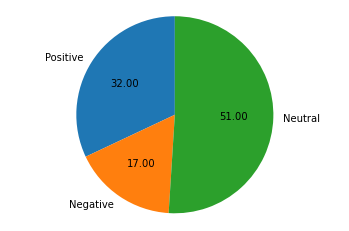

In [62]:
pieLabels=["Positive","Negative","Neutral"]

populationShare=[pos,neg,neu]

figureObject, axesObject = plt.subplots()

axesObject.pie(populationShare,labels=pieLabels,autopct='%1.2f',startangle=90)

axesObject.axis('equal')

plt.show()

In [63]:
# Display the number of twitter users who feel a certain way about the given topic.

print("%f percent of twitter users feel positive about %s"%(pos,query))

print("%f percent of twitter users feel negative about %s"%(neg,query))

print("%f percent of twitter users feel neutral about %s"%(neu,query))

32.000000 percent of twitter users feel positive about bitcoin
17.000000 percent of twitter users feel negative about bitcoin
51.000000 percent of twitter users feel neutral about bitcoin


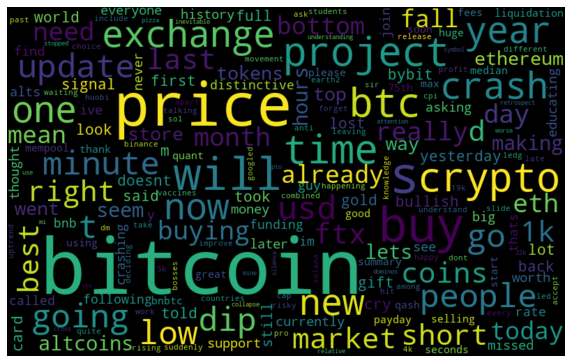

In [64]:
# Create a Wordcloud from the tweets

all_words = ' '.join([text for text in cleaned])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

[('NBCNews:', 1), ('NEW:', 1), ('@NBCNews', 1), ('Poll', 1), ('offering', 1), ('drove', 1), ('https://t.co/iZ2WVqMdpK', 1), ('pictures:', 1), ('crucial', 1), ('https://t.co/cVaPKWQ96Y', 1), ('https://t.co/eVo8y7PPfN', 1), ('Welcome', 1), ('Twitter', 1), ('dot', 1), ('com,', 1), ('one', 1), ('internet', 1), ('things', 1), ('Grab', 1), ('popcor…', 1), ('https://t.co/3AxWAYPShv', 1), ('Wintrust', 1), ('Business', 1), ('Lunch', 1), ('11/8/22:', 1), ('stock', 1), ('bounce,', 1), ('recession', 1), ('fears', 1), ('return,', 1), ('...', 1), ('https://t.co/sJmokXGOiw', 1), ('Live:', 1), ('Results', 1), ('https://t.co/haH9Jiz7TS', 1), ('Explained:', 1), ('https://t.co/4S9MGrfMFm', 1), ('https://t.co/W4DyLVWKVn', 1), ('States,', 1), ('follow', 1), ('along', 1), ("@NPR's", 1), ('blog', 1), ('here:', 1), ('https://t.co/9XOcXtucP8', 1), ('Tuesday', 1), ('marks', 1), ('since', 1), ('passage', 1), ('Georgia’s', 1), ('new', 1), ('law,', 1), ('testing', 1), ('electi…', 1), ('https://t.co/FbAic451SE', 1)

5

In [ ]:
wordsCount = {}

for tweet in list1:
    split = tweet[0].split()
    
    for word in split:
        if word in wordsCount:
            wordsCount[word] += 1
        else:
            wordsCount[word] = 1
            
            
    
   
sortedByOccurences = sorted(wordsCount.items(), key=lambda x:x[1])
print(sortedByOccurences)

